# Exercises

## Useful links

1. [API Reference](https://plotnine.org/reference)
2. [gallery](https://plotnine.org/gallery/)
3. [tutorials](https://plotnine.org/gallery/)

Grab the data and functions from the `tutorial` notebook.

In [1]:
from plotnine import *
import pandas as pd
import numpy as np

def group_top(data, group, column, n):
    """
    Select the top n rows from each group in a dataframe based on a specified column
    """
    def top_n(gdf):
        return gdf.sort_values(column, ascending=False).head(n)
    return (
        data.groupby(group)
        .apply(top_n, include_groups=False)
        .reset_index()
        [data.columns]
    )

def group_bottom(data, group, column, n):
    """
    Select the bottom n rows from each group in a dataframe based on a specified column
    """
    def bottom_n(gdf):
        return gdf.sort_values(column, ascending=True).head(n)
    return (
        data.groupby(group)
        .apply(bottom_n, include_groups=False)
        .reset_index()
        [data.columns]
    )

def group_multi_top(data, group, columns, n):
    """
    Select the top n rows from each group in a dataframe for multiple columns
    """
    frames = [group_top(data, group, col, n) for col in columns]
    return (
        pd.concat(frames)
        .drop_duplicates()
        .sort_values(by=[group, *columns])
        .reset_index(drop=True)
    )

def group_multi_bottom(data, group, columns, n):
    """
    Select the bottom n rows from each group in a dataframe for multiple columns
    """
    frames = [group_bottom(data, group, col, n) for col in columns]
    return (
        pd.concat(frames)
        .drop_duplicates()
        .sort_values(by=[group, *columns])
        .reset_index(drop=True)
    )

def group_sum(data, group, columns):
    """
    Sum up all columns in a group
    """
    if isinstance(group, str):
        group = [group]
    else:
        group = list(group)
    return data.groupby(group)[columns].agg("sum").reset_index()

def dataframe_difference(df1, df2):
    """
    Remove all rows in df1 that are also in df2.
    """
    # Ensure the column order and names match for comparison
    common_columns = df1.columns.intersection(df2.columns)
    # Convert rows to tuples and compare them
    s1 = df1[common_columns].apply(tuple, axis=1)
    s2 = df2[common_columns].apply(tuple, axis=1)
    return df1.loc[~s1.isin(s2)].reset_index(drop=True)

def _rename_columns(s):
    if s.endswith("population"):
        return f"{s.split()[0]}"
    return s.replace("(km²)","").strip().replace(" ", "_")

# Units
# area - km²
# density - /km²

population_data = (
    pd.read_csv("data/world_population_data.csv")
    .rename(_rename_columns, axis=1)
    .drop(columns=["rank"])
    .melt(
        id_vars=["country", "continent", "area"],
        value_vars=["2023", "2022", "2020", "2015", "2010", "2000", "1990", "1980", "1970"],
        var_name="year",
        value_name="population",
    )
    .astype({"year": int})
)

def by_year(data, year):
    """
    Return a subset of the data for a given year
    """
    return data[data["year"] == year].reset_index(drop=True)

def by_continent(data, continent):
    """
    Return a subset of the data for a given continent
    """
    return data[data["continent"] == continent].reset_index(drop=True)

thousand = 10 ** 3
million = 10 ** 6
billion = 10 ** 9

## Practice data

When you finish any of the exercises early and you need something else, you can try visualising any of these subset dataframes. You can create subsets of them again. Have fun

In [2]:
population_data_2023 =  by_year(population_data, 2023)

africa_data = by_continent(population_data, "Africa")
asia_data = by_continent(population_data, "Asia")
north_america_data = by_continent(population_data, "North America")
south_america_data = by_continent(population_data, "South America")
europe_data = by_continent(population_data, "Europe")
oceania_data = by_continent(population_data, "Oceania")

## Part 1: `continents_data`

In [3]:
continents_data = group_sum(population_data, ["continent", "year"], "population")

### Exercise 1

Create a point graph of the datasets `continents_data` with the `year` on the `x` axis and the `population` on the `y` axis.

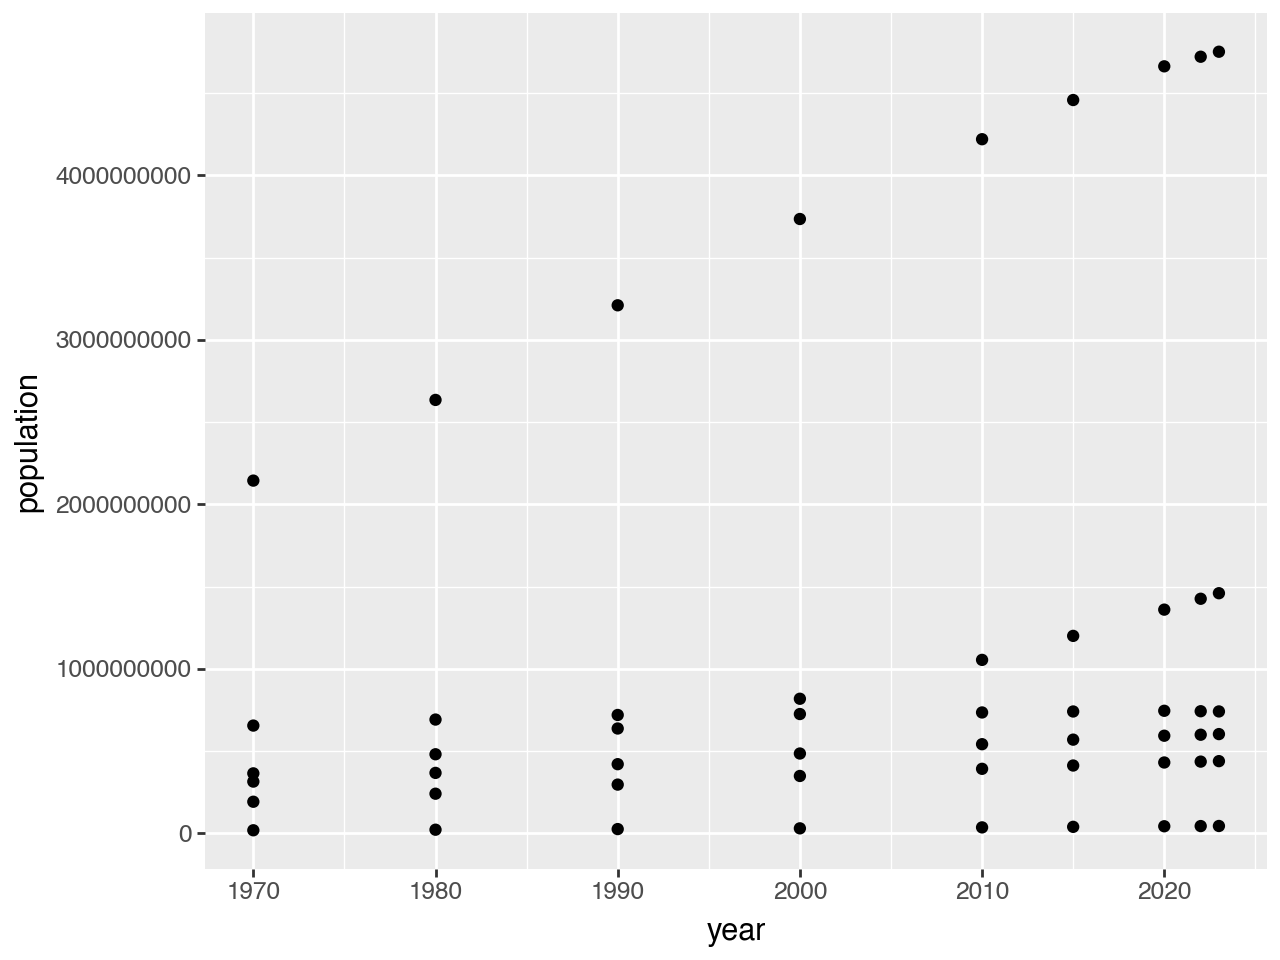

In [4]:
# Your solution here
(
    ggplot(continents_data, aes("year", "population"))
    + geom_point()
)


### Exercise 2
Copy your solution from [Exercise 1](exercises.ipynb#Exercise-1) and:

- Add some colour
- Make it easy to read the big numbers
- Make sure the axes are well labelled

In [5]:
# Your solution here



### Exercise 3
Copy your solution from [Exercise 2](exercises.ipynb#Exercise-2) and create well scaled panels for each continent.

In [6]:
# Your solution here



### Exercise 4

Copy your solution from [Exercise 3](exercises.ipynb#Exercise-3).
- Add a line that passes through the dots. You need to find a suitable [geom](https://plotnine.org/reference/#geoms)
- Customise the plot in your unique way.
    * The default theme that we modify using [theme()](https://plotnine.org/reference/theme.html) is [theme_gray](https://plotnine.org/reference/theme_gray.html#gray), try using another theme. See how it is done [here](https://plotnine.org/reference/theme_classic.html#classic).
    * While you are at it use [labs](https://plotnine.org/reference/labs.html#plotnine.labs) to add a caption to the plot

In [7]:
# Your solution here



### Exercise 5

Given your solution in [Exercise 4](exercises.ipynb#Exercise-4), can you change the scale of anything else.
Look at the the list of available scales in the [API Reference](https://plotnine.org/reference/#scales).


In [8]:
# Your solution here



## Part 2: Mapping Uganda

### Exercise 6 - Visualise the population of regions Tanzania.

You can draw plotnine can draw maps. In the `tz_maps` module, we prepare some data for you and import it.
Make something of it. You can see some examples at [geom_map](https://plotnine.org/reference/geom_map.html#examples).

In [1]:
from ug_maps import (
    # All these are geopandas dataframes
    ug,
    ug_regions,
    ug_subregions,
    ug_districts,
    ug_subcounties,
    ug_towns,
    ug_lakes,
    ug_rivers,
)

Read from the cache: data/maps/2014/ug.gpkg
Read from the cache: data/maps/2014/ug_districts.gpkg
Read from the cache: data/maps/2014/ug_regions.gpkg
Read from the cache: data/maps/2014/ug_subregions.gpkg
Read from the cache: data/maps/2014/ug_subcounties.gpkg
Read from the cache: data/maps/2014/ug_towns.gpkg
Read from the cache: data/maps/2014/ug_lakes.gpkg
Read from the cache: data/maps/2014/ug_rivers.gpkg


_HINT: See what each dataframe contains. You can plot a simple map with only two lines._

In [22]:
zones

,name,population,geometry
0,Northern Zone,8755751.0,"MULTIPOLYGON (((34.74025 -3.74482, 34.74144 -3..."
1,Coastal Zone,13870747.0,"MULTIPOLYGON (((35.32406 -8.87103, 35.32497 -8..."
2,Central Zone,7429725.0,"MULTIPOLYGON (((31.03872 -5.5554, 31.0397 -5.5..."
3,Lake Zone,15521932.0,"MULTIPOLYGON (((30.4059 -2.86042, 30.40599 -2...."
4,Western Zone,3479408.0,"MULTIPOLYGON (((29.59467 -4.9038, 29.59471 -4...."
5,Zanzibar زنجبار,1748498.0,"MULTIPOLYGON (((39.6317 -5.40481, 39.63177 -5...."
6,Southern Highlands Zone,8530285.0,"MULTIPOLYGON (((30.49624 -7.11746, 30.49626 -7..."


In [3]:
from plotnine import *

In [8]:
ug_districts

,OBJECTID,DNAME2014,SUBREGION,REGION,HH2014,HHSIZE2014,MALES2014,FEMALE2014,POP_2014,POP_URBAN,...,F1969_2014,TotCon2011,ACCS_ELE_H,STATUS,GlobalID,CreationDa,Creator,EditDate,Editor,geometry
0,1,ABIM,KARAMOJA,NORTHERN REGION,18297,5.907169,52963,56076,109039,17400,...,4.20,211.000000,1.504846,Electrified,00f0f165-82d9-442c-98e8-04dddc6f7e12,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((33.61258 3.13106, 33.61352 3.13062, ..."
1,2,ADJUMANI,WEST NILE,NORTHERN REGION,41626,5.503721,111503,121310,232813,43022,...,3.80,315.000000,0.589424,Electrified,064867da-450d-4df8-a683-8e6b1728506d,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((32.04597 3.58896, 32.04548 3.58841, ..."
2,3,AGAGO,ACHOLI,NORTHERN REGION,43274,5.224076,110095,117391,227486,29167,...,2.57,482.000000,0.991467,Electrified,301f7fbc-91a9-4ad1-b7ff-e250267cc0d5,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((33.41652 3.30434, 33.41701 3.30403, ..."
3,4,ALEBTONG,LANGO,NORTHERN REGION,45555,4.908940,109276,116051,225327,6628,...,2.83,0.000000,0.000000,Electrified,242e5e36-095e-4e4d-a280-170493502331,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((33.03629 2.50129, 33.03664 2.50075, ..."
4,5,AMOLATAR,LANGO,NORTHERN REGION,27885,5.248035,72492,74412,146904,21434,...,2.78,0.000000,0.000000,Electrified,09b2b5f9-1982-42ca-b59f-5f46cd5daa35,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((32.9014 1.8057, 32.90231 1.80568, 32..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,SSEMBABULE,CENTRAL 1,CENTRAL REGION,55538,4.478836,125395,127599,252994,17024,...,3.22,345.176827,0.725691,Electrified,ce22b7b4-4bc7-4c17-a16a-7419de95a6c1,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((31.16746 0.23304, 31.16911 0.23182, ..."
108,109,TORORO,ELGON,EASTERN REGION,108044,4.742557,260101,280329,526378,72537,...,2.46,3395.612738,3.387766,Electrified,959761af-2a82-4220-8f3b-d00881e20dca,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.09329 0.90228, 34.09371 0.90204, ..."
109,110,WAKISO,CENTRAL 1,CENTRAL REGION,504620,3.886910,952781,1054919,2007700,638487,...,4.27,81663.472955,34.043885,Electrified,024c970a-a831-4918-b78c-41d1ee7ede82,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((32.58831 0.57438, 32.58969 0.57431, ..."
110,111,YUMBE,WEST NILE,NORTHERN REGION,63722,7.557916,229811,255771,485582,35606,...,4.77,0.000000,0.000000,Under Construction,0a5a2649-d71e-466b-b3e3-af5c44769ef5,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((31.21318 3.79486, 31.21362 3.79452, ..."


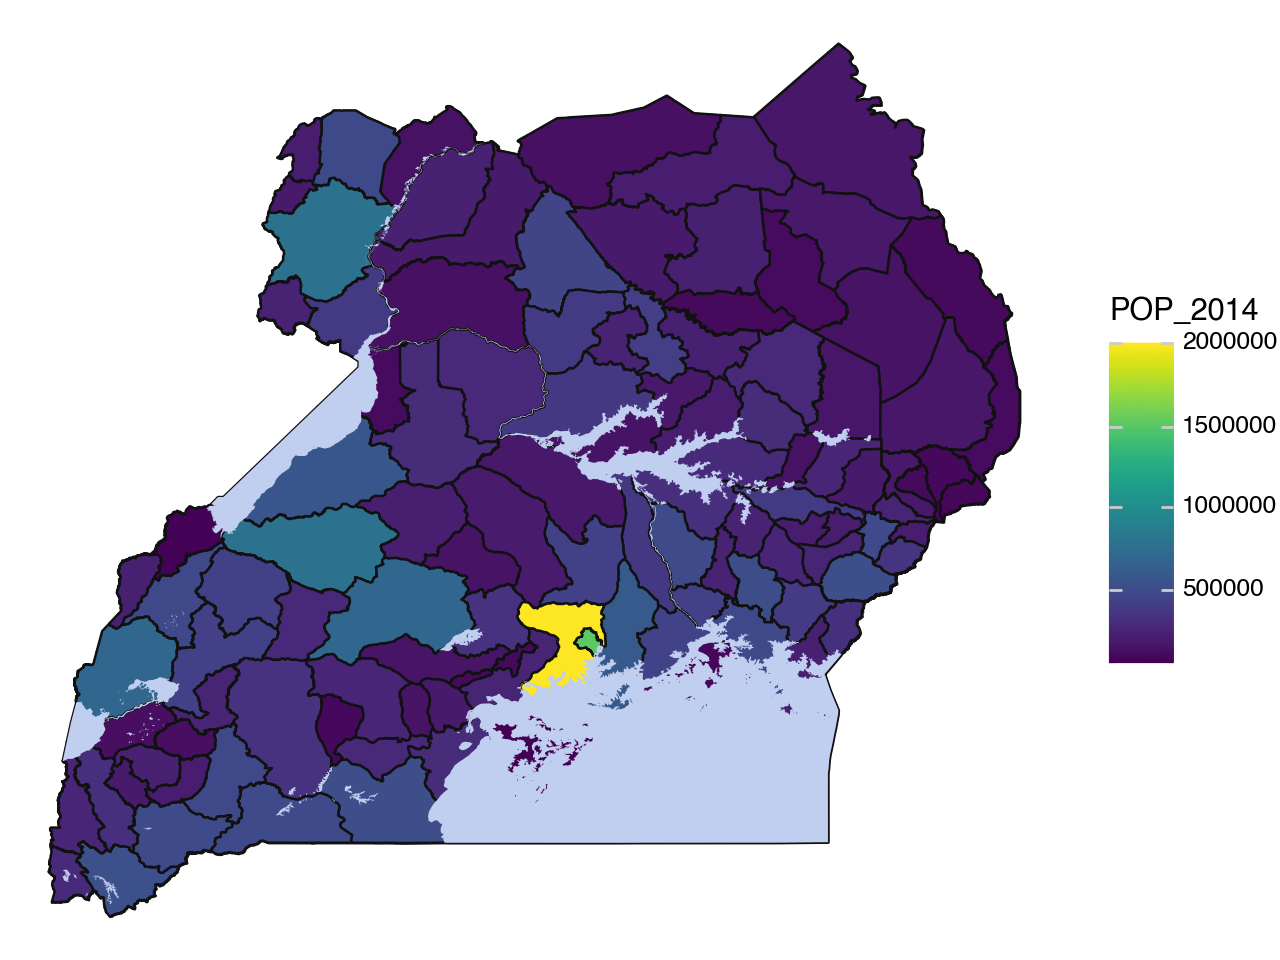

In [12]:
water_color = "#C0CEEF"

(
    ggplot()
    + geom_map(ug, fill="none")
    + geom_map(ug_districts, aes(fill="POP_2014"))
    + geom_map(ug_lakes, fill=water_color, color="none")
    + theme_void()
)